<div text align= center>
 <h1>
    <b>PPG SIMULATION</b>
 </h1>
</div>

<h1>
    <b>Apa itu PPG?</b>
</h1> 

Photoplethysmography (PPG) adalah metode non-invasif untuk mengukur perubahan volume darah menggunakan cahaya. Sinyal ini sering digunakan dalam perangkat wearable untuk memantau detak jantung.

[Source](https://doi.org/10.1016/b978-0-12-823374-0.00001-3)

<h1>
    <b>Analisis Downsampling pada Sinyal PPG: Dampak Aliasing dan Kehilangan Informasi</b>
</h1>
<br>
<div text align= center>
    <b>Simulasi Sinyal PPG</b><br>
</div>
<b>Parameter Simulasi</b><br>

- Durasi: 055 detik (mengacu pada 3 digit terakhir NIM)
- Sampling Rate: 150 Hz
- Noise Level: 0.55 (mengacu pada 2 digit terakhir NIM)
- Heart Rate: 80 BPM
- Random State: 040514 (dari tanggal lahir)

<b>Library yang digunakan</b><br>

- neurokit2
- matplotlib
- numpy

Skipping random IBI modulation, since the offset_weight 0.99 leads to physiologically implausible wave durations of 7.910314330606294 milliseconds.


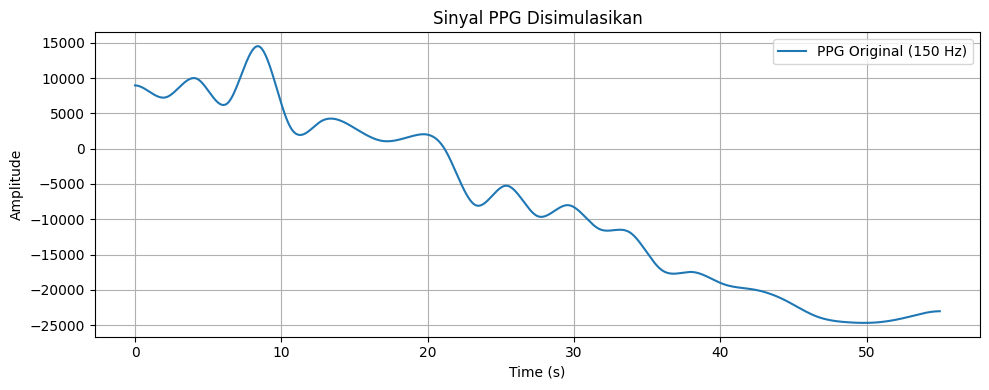

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np

# Parameter
duration = 55 #Durasi yang digunakan adalah 55 detik bukan 0.55 sebab durasi 0.55 detik tidak cukup untuk membentuk satu siklus jantung
sampling_rate = 150
noise = 0.55
heart_rate = 80
random_state = 40514

# Simulasi sinyal PPG
ppg = nk.ppg_simulate(duration, sampling_rate, duration, noise, heart_rate, random_state)

# Normalisasi sinyal PPG
ppg_normalized = (ppg - np.min(ppg)) / (np.max(ppg) - np.min(ppg))

# Waktu
time = np.linspace(0, duration, len(ppg))


# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, ppg, label="PPG Original (150 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sinyal PPG Disimulasikan")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


<b>Penjelasan Output Plot</b><br>

- Plot sinyal menunjukkan osilasi periodik dengan frekuensi $1,333 Hz$, mirip denyut jantung, namun tidak menyerupai bentuk gelombang PPG yang khas karena kurangnya <i>sharp systolic peak and dicrotic notch.</i> 
- Sinyal ini lebih menyerupai <i>noisy sinusoid wave</i> dengan tren penurunan dari $+15000$ hingga $-25000$ selama $55$ detik, yang tidak umum untuk PPG yang biasanya stabil. 
- Amplitudo sinyal sangat besar $(-25000$ hingga $+15000)$, menunjukkan kurangnya normalisasi, dengan noise $0,55$ yang menyebabkan fluktuasi acak kecil namun tidak mengaburkan pola periodik utama.

---


<div text align= center>
<h1>
    <b>Downsampling & Aliasing pada Sinyal PPG</b>
</h1>
</div>

<b>Apa itu Downsampling?</b><br>
<b>Downsampling</b> adalah proses menurunkan frekuensi sampling dari sinyal digital. Misalnya, dari 150 sampel per detik menjadi hanya 10 sampel per detik.
$$
x_{\text{down}}[n] = x[n \cdot R]
$$
dengan $R$ adalah rasio downsampling (misalnya $R=15$ untuk 150Hz → 10Hz)

<b>Apa itu Aliasing?</b><br>
<b>Aliasing</b> adalah fenomena saat sinyal frekuensi tinggi dalam domain analog <b>tidak dapat direpresentasikan dengan benar</b> pada frekuensi sampling yang rendah, sehingga <b>terlihat sebagai frekuensi yang salah.</b>

<b>Rumus Nyquist</b><br>

Untuk menghindari aliasing, frekuensi sampling $f_s$ harus lebih dari dua kali frekuensi tertinggi sinyal:

$$
f_s \geq 2 f_{\text{max}}
$$

Kita akan menggunakan sinyal PPG sebelumnya kemudian downsampling ke ${100, 50, 25, 10, 5}$ Hz.


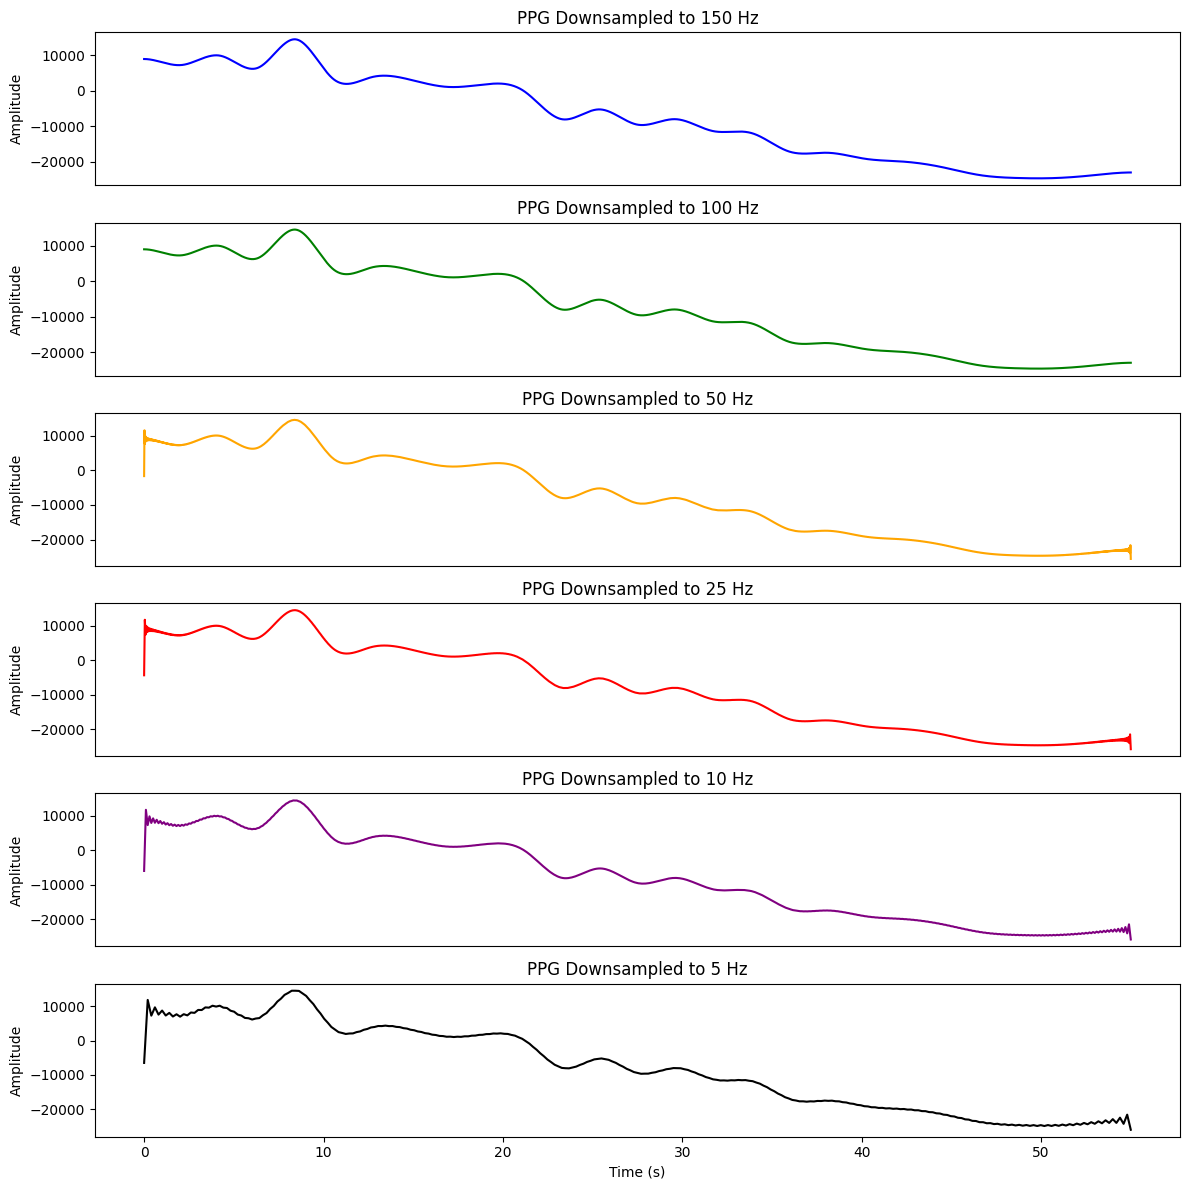

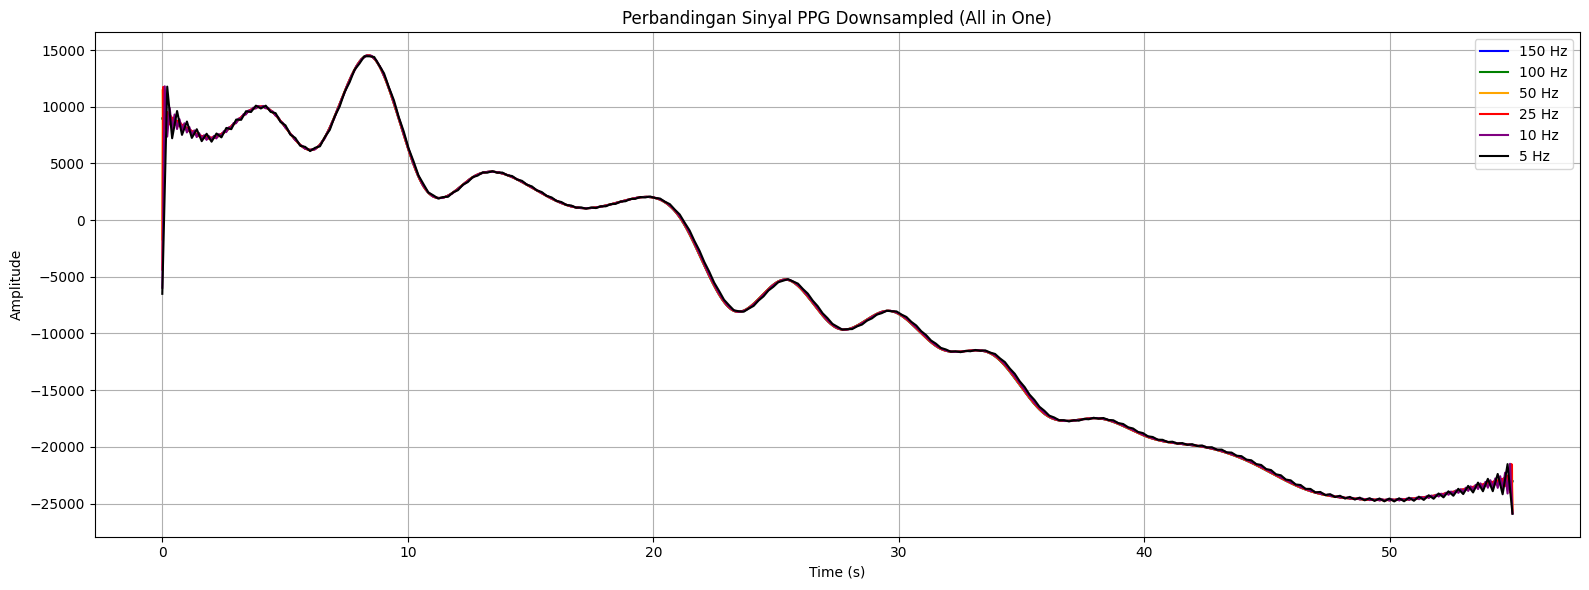

In [ ]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

# Daftar sampling rate yang ingin diuji
sampling_rates = [150, 100, 50, 25, 10, 5]
colors = ['blue', 'green', 'orange', 'red', 'purple', 'black']

# Waktu asli (untuk 150 Hz)
time = np.linspace(0, duration, len(ppg))

# ---------- PLOT 1: SUBPLOT PER SAMPLING RATE ----------
plt.figure(figsize=(12, 12))
for i, fs in enumerate(sampling_rates):
    factor = int(150 / fs)
    ppg_down = signal.resample(ppg, len(ppg) // factor)
    t_down = np.linspace(0, duration, len(ppg_down))

    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(t_down, ppg_down, color=colors[i])
    plt.title(f"PPG Downsampled to {fs} Hz")
    plt.ylabel("Amplitude")
    if i == len(sampling_rates) - 1:
        plt.xlabel("Time (s)")
    else:
        plt.xticks([])  # Supaya lebih bersih

plt.tight_layout()
plt.show()

# ---------- PLOT 2: SEMUA DALAM 1 PLOT ----------
plt.figure(figsize=(16, 6))
for i, fs in enumerate(sampling_rates):
    factor = int(150 / fs)
    ppg_down = signal.resample(ppg, len(ppg) // factor)
    t_down = np.linspace(0, duration, len(ppg_down))

    plt.plot(t_down, ppg_down, color=colors[i], label=f"{fs} Hz")

plt.title("Perbandingan Sinyal PPG Downsampled (All in One)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---
<b>Penjelasan Output Plot</b>

- Gambar pertama terdiri dari enam subplot, yang masing-masing menunjukkan sinyal PPG yang diturunkan sampelnya ke laju yang berbeda—$150$, $\text{Hz}$ (asli), $100$, $\text{Hz}$, $50$, $\text{Hz}$, $25$, $\text{Hz}$, $10$, $\text{Hz}$, dan $5$, $\text{Hz}$—selama durasi $55$ $\text{detik}$. 
- Sinyal, yang memiliki denyut jantung $80$, $\text{BPM}$ (setara dengan $1,333$, $\text{Hz}$), menunjukkan bentuk sinusoidal dengan tren menurun dari sekitar $+15000$ ke $-25000$ unit amplitudo, yang mencerminkan tingkat noise $0,55$ dan kurangnya bentuk pulsa PPG yang umum. 
- Ketika laju pengambilan sampel menurun, jumlah sampel per siklus jantung turun dari $112,5$ pada $150$, $\text{Hz}$ menjadi $3,75$ pada $5$, $\text{Hz}$, yang menyebabkan distorsi yang terlihat:
    - Sinyal $150$, $\text{Hz}$ menangkap osilasi dengan jelas, sementara sinyal $100$, $\text{Hz}$ dan $50$, $\text{Hz}$ menunjukkan sedikit penghalusan, sinyal $25$, $\text{Hz}$ kehilangan detail yang signifikan, dan sinyal $10$, $\text{Hz}$ dan $5$, $\text{Hz}$ sangat terdistorsi, hampir tidak mencerminkan periodisitas asli. 
- Gambar kedua memplot semua sinyal yang diturunkan sampelnya pada satu grafik untuk perbandingan, yang menyoroti hilangnya detail secara progresif dan peningkatan distorsi ketika laju pengambilan sampel menurun, dengan sinyal $5$, $\text{Hz}$ tampak hampir tidak dapat dikenali dibandingkan dengan aslinya. 
- Perbandingan visual ini menggarisbawahi bagaimana downsampling mengurangi resolusi sinyal, yang menyebabkan hilangnya informasi dan distorsi, sehingga menyiapkan landasan untuk analisis lebih lanjut mengenai aliasing dalam domain frekuensi, karena laju yang lebih rendah gagal menangkap komponen frekuensi sinyal di atas frekuensi Nyquist (misalnya, $2,5$, $\text{Hz}$ pada $5$, $\text{Hz}$).

---

<b>Apa itu "Order" dalam filtering?</b>

Order dalam filter (baik Butterworth, Chebyshev, dll) mengacu ke kompleksitas filter tersebut — tepatnya, berhubungan dengan seberapa curam transisi dari passband ke stopband.
- Passband: Range frekuensi yang boleh lewat.
- Stopband: Range frekuensi yang harus diblokir.
- Transition band: Area peralihan antara passband ke stopband.

<b>Semakin tinggi order filter:</b>

- Transisi dari passband ke stopband makin curam (sharp).
- Filter lebih efektif memisahkan sinyal frekuensi tinggi/rendah.
- Tapi, sinyal juga bisa terkena distorsi seperti overshoot dan delay.
- Komputasi lebih berat karena persamaan filter lebih kompleks.

<b>Butterworth VS Chebyshev</b><br>

| Filter            | Karakter                                  | Analogi                                                                 |
|-------------------|-------------------------------------------|-------------------------------------------------------------------------|
| Butterworth       | Halus, rata, tidak ada riak              | Seperti saringan air biasa — aliran stabil, tidak ada getaran aneh.     |
| Chebyshev Type I  | Cepat menyaring tapi permukaannya ada riak | Seperti saringan air cepat yang kadang berbuih karena tekanan tinggi.   |
| Chebyshev Type II | Halus di awal, tapi buih di bagian buangan | Seperti saringan halus, tapi pembuangan airnya agak bergelombang.       |

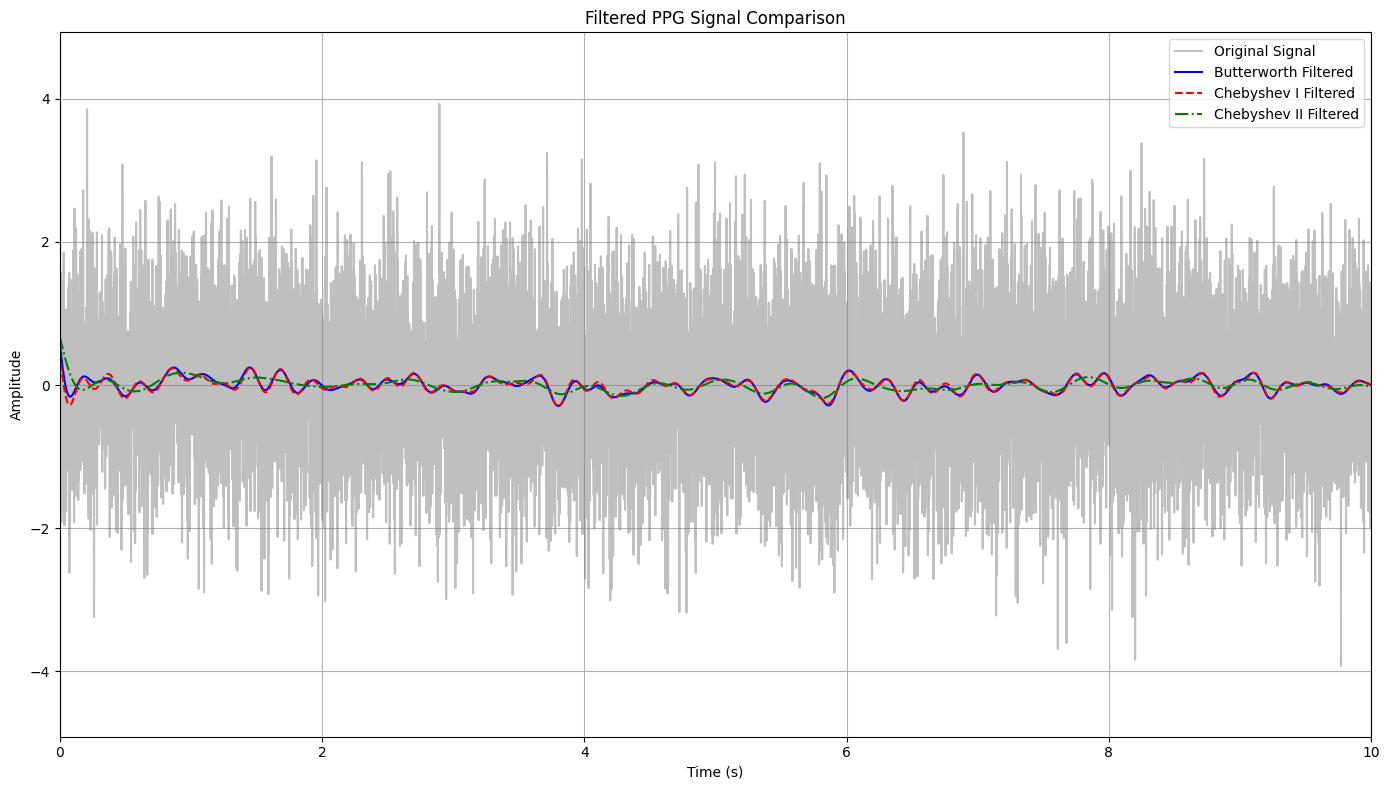

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# # Dummy signal for testing (uncomment if no real PPG signal is available)
# np.random.seed(42)
# ppg_signal = np.random.randn(55000)  # 55 seconds of random signal
fs = 1000  # Sampling rate in Hz (adjust if different)

# Validate inputs
if not isinstance(ppg_signal, np.ndarray) or len(ppg_signal) == 0:
    raise ValueError("ppg_signal must be a non-empty numpy array")
if fs <= 0:
    raise ValueError("Sampling rate (fs) must be positive")
if len(ppg_signal) < fs:
    print("Warning: Signal length is shorter than 1 second. Results may be unreliable.")

# Filter parameters
cutoff = 5  # Target cutoff frequency (5 Hz) to remove high-frequency noise
order = 4  # Filter order
ripple_pass = 1  # Ripple in passband for Chebyshev I (dB)
ripple_stop = 40  # Attenuation in stopband for Chebyshev II (dB)

# Normalized cutoff frequency (cutoff / Nyquist frequency)
normal_cutoff = cutoff / (0.5 * fs)
if normal_cutoff >= 1 or normal_cutoff <= 0:
    raise ValueError("Cutoff frequency must be between 0 and Nyquist frequency (fs/2)")

# Create filters
try:
    # Butterworth filter
    b_butt, a_butt = signal.butter(order, normal_cutoff, btype='low', analog=False)
    # Chebyshev Type I filter
    b_cheby1, a_cheby1 = signal.cheby1(order, ripple_pass, normal_cutoff, btype='low', analog=False)
    # Chebyshev Type II filter
    b_cheby2, a_cheby2 = signal.cheby2(order, ripple_stop, normal_cutoff, btype='low', analog=False)
except ValueError as e:
    raise ValueError(f"Filter creation failed: {e}")

# Apply filters to the signal
try:
    ppg_butt = signal.filtfilt(b_butt, a_butt, ppg_signal)
    ppg_cheby1 = signal.filtfilt(b_cheby1, a_cheby1, ppg_signal)
    ppg_cheby2 = signal.filtfilt(b_cheby2, a_cheby2, ppg_signal)
except Exception as e:
    raise RuntimeError(f"Filtering failed: {e}")

# Time axis
t = np.arange(len(ppg_signal)) / fs

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(t, ppg_signal, label='Original Signal', color='gray', alpha=0.5)
plt.plot(t, ppg_butt, label='Butterworth Filtered', color='blue')
plt.plot(t, ppg_cheby1, label='Chebyshev I Filtered', color='red', linestyle='--')
plt.plot(t, ppg_cheby2, label='Chebyshev II Filtered', color='green', linestyle='-.')
plt.title('Filtered PPG Signal Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xlim([0, min(10, len(ppg_signal) / fs)])  # Zoom to first 10 seconds or signal end
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

---

<b>Penjelasan Output Plot</b><br>

<b>Sinyal Asli ("Original Signal")</b>

- Warna abu-abu terang.
- Sangat berisik (noise tinggi).
- Banyak lonjakan besar yang bukan detak jantung aslinya. Ini biasanya noise dari sensor, gerakan, atau sinyal listrik.

<b>Sinyal Setelah Filtering</b>

- Butterworth Filtered → warna biru garis solid.

- Chebyshev I Filtered → warna merah garis putus-putus.

- Chebyshev II Filtered → warna hijau garis putus-dan-titik.